HW3 - standard-identification-deeplearning


SubHW3-3

This sub-assignment is part of HW3 from the course Standard Identification with Deep Learning. It applies dimensionality reduction to the wheat seeds dataset using PCA and visualizes the data in a reduced feature space.

A) Variance Retention Analysis with PCA

The wheat dataset is loaded and cleaned, excluding the class label.

PCA is applied to the feature matrix to extract principal components.

The cumulative explained variance ratio is calculated to evaluate how many components are needed to preserve 90% and 99% of the dataset’s total variance.

This helps determine the minimum number of components required for efficient dimensionality reduction without losing significant information.

B) 2D PCA Scatter Plot with Labels

The dataset is projected into a 2D space using the first two principal components.

A scatter plot is created where each point represents a data sample in reduced space.

Points are color-coded according to their class labels, enabling visual assessment of how well the reduced representation separates the classes.



Dataset loaded successfully!
Shape of dataset: (210, 8)

    Area  Perimeter  Compactness  Kernel_Length  Kernel_Width  \
0  15.26      14.84       0.8710          5.763         3.312   
1  14.88      14.57       0.8811          5.554         3.333   
2  14.29      14.09       0.9050          5.291         3.337   
3  13.84      13.94       0.8955          5.324         3.379   
4  16.14      14.99       0.9034          5.658         3.562   

   Asymmetry_Coeff  Kernel_Groove_Length  Class  
0            2.221                 5.220      1  
1            1.018                 4.956      1  
2            2.699                 4.825      1  
3            2.259                 4.805      1  
4            1.355                 5.175      1  
Minimum components for 90% variance: 2
Minimum components for 99% variance: 2


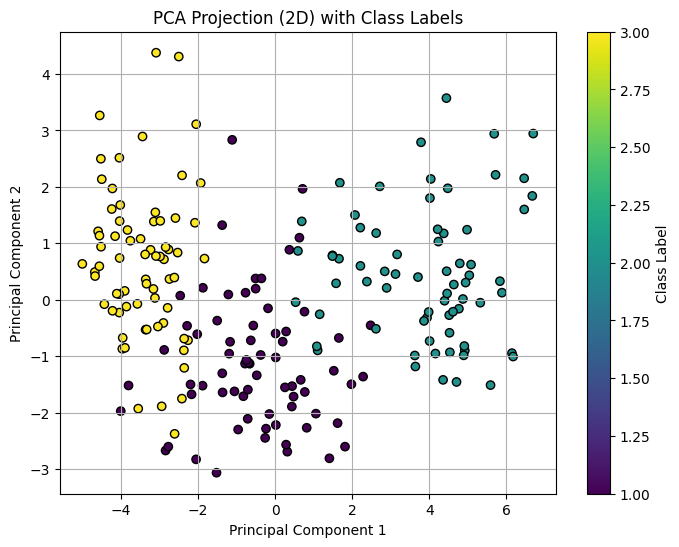

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv("seeds_dataset.txt", sep="\s+", header=None, engine="python")
df.columns = ['Area', 'Perimeter', 'Compactness', 'Kernel_Length', 'Kernel_Width',
              'Asymmetry_Coeff', 'Kernel_Groove_Length', 'Class']

print("Dataset loaded successfully!")
print(f"Shape of dataset: {df.shape}\n")
print(df.head())

# Prepare features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Initialize PCA and fit
pca_full = PCA()
pca_full.fit(X)

# Calculate cumulative variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
components_90 = np.argmax(cumulative_variance >= 0.9) + 1
components_99 = np.argmax(cumulative_variance >= 0.99) + 1

print(f"Minimum components for 90% variance: {components_90}")
print(f"Minimum components for 99% variance: {components_99}")

# Transform data using PCA with components_90
pca = PCA(n_components=components_90)
X_pca = pca.fit_transform(X)

# Plot 2D projection (first two components)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('PCA Projection (2D) with Class Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class Label')
plt.grid(True)
plt.show()


C) PCA Reconstruction Error Evaluation

In this final part of SubHW3-3, we assess how well PCA retains the original data structure as we vary the number of principal components.

Objective-->
We want to evaluate the reconstruction error, i.e., how much information is lost when projecting the data into a lower-dimensional space and then reconstructing it back.

Procedure

1.Define a range of principal components from 1 to 7.

2.For each number of components:

-Fit PCA with n components.

-Transform the data (fit_transform) and then reconstruct it (inverse_transform).

-Compute the Mean Squared Error (MSE) between the original data and the reconstructed version.

-Store each reconstruction error in a list and visualize how the error decreases as more components are used.

Reconstruction Errors:
With 1 components: 0.3157
With 2 components: 0.0129
With 3 components: 0.0025
With 4 components: 0.0006
With 5 components: 0.0002
With 6 components: 0.0000
With 7 components: 0.0000


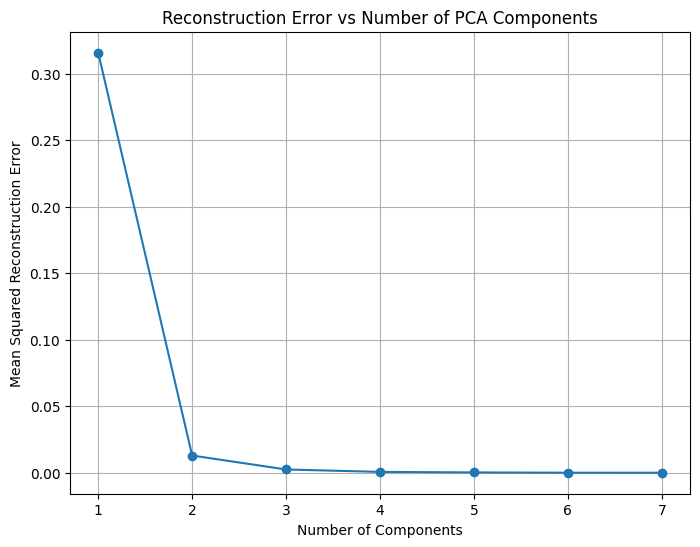

In [7]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Define component range and error storage
num_components = range(1, 8)
reconstruction_errors = []

# Loop through different numbers of components
for n in num_components:
    # Fit PCA with n components
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X)

    # Reconstruct data from PCA projection
    X_projected = pca.inverse_transform(X_pca)

    # Compute reconstruction error (mean squared error)
    error = np.mean((X - X_projected) ** 2)
    reconstruction_errors.append(error)

# Print reconstruction errors
print("Reconstruction Errors:")
for i, error in enumerate(reconstruction_errors, start=1):
    print(f"With {i} components: {error:.4f}")

# Plot reconstruction error vs number of components
plt.figure(figsize=(8, 6))
plt.plot(num_components, reconstruction_errors, marker='o')
plt.title('Reconstruction Error vs Number of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Mean Squared Reconstruction Error')
plt.xticks(num_components)
plt.grid(True)
plt.show()


D) LDA: Supervised Dimensionality Reduction and Visualization

In this section, we apply Linear Discriminant Analysis (LDA) to the wheat seed dataset in order to project the data into a lower-dimensional space that preserves class discrimination.

The input dataset X (excluding class labels) and corresponding labels y are used.

We initialize LinearDiscriminantAnalysis with n_components=2 to reduce the feature space to two dimensions.

The model is fit on the dataset using lda.fit_transform(X, y) to compute the most discriminative linear combinations of features.

The result is a 2D representation (X_lda) where the between-class variance is maximized relative to within-class variance.

We then visualize the transformed data using a scatter plot:

Each point corresponds to a sample in the 2D LDA space.

Points are colored based on their class label (y) to highlight separation between classes.

This visualization helps understand how well LDA distinguishes between the different wheat seed types in the reduced feature space.

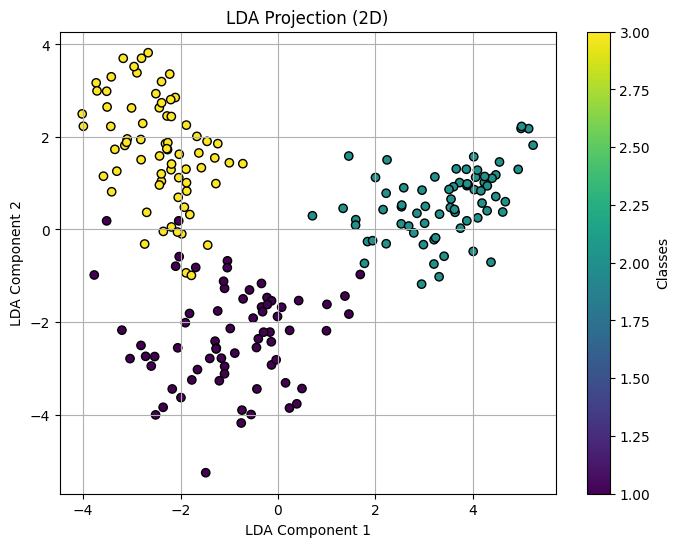

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# Initialize LDA with 2 components
lda = LinearDiscriminantAnalysis(n_components=2)

# Fit the model and transform the data
X_lda = lda.fit_transform(X, y)

# Scatter plot of LDA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('LDA Projection (2D)')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.colorbar(label='Classes')
plt.grid(True)
plt.show()


E) Identifying Feature Contributions to LDA Components

In this final section, we analyze which original features contribute most and least to each Linear Discriminant Analysis (LDA) component.

Step 1: Fit LDA and Analyze Coefficients

We first fit the LDA model using lda.fit(X, y).
Then, we extract the component coefficients (lda.scalings_), which indicate the importance of each original feature in the formation of each LDA direction.

We compute the absolute values of these coefficients to focus on magnitude of contribution (ignoring sign).
Using np.argmax and np.argmin, we identify:

-The most contributing feature (largest absolute coefficient).

-The least contributing feature (smallest absolute coefficient).

This analysis is repeated for each LDA component and printed in a readable format.

Step 2: Visualizing Discriminative Features

We use the features identified from the coefficients to visualize how well they separate the data.

First LDA Component:
We visualize feature index 3 vs. feature index 4 with a color-coded scatter plot, showing class separation in 2D space.

Second LDA Component:
Similarly, we plot feature index 2 vs. feature index 5 to observe another discriminative view.

These visualizations help intuitively understand which feature pairs are most informative for class distinction according to LDA.

In [9]:
#STEP1

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np

# Fit the LDA model on the full dataset
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, y)

# Get the LDA component coefficients (scalings)
lda_components = lda.scalings_

# Compute absolute values of the coefficients
absolute_coeffs = np.abs(lda_components)

# Identify the most and least contributing feature indices for each LDA component
most_contributing = np.argmax(absolute_coeffs, axis=0)
least_contributing = np.argmin(absolute_coeffs, axis=0)

# Print the contribution information for each LDA component
num_components = lda_components.shape[1]
for i in range(num_components):
    most_idx = most_contributing[i]
    least_idx = least_contributing[i]
    print(f"LDA Component {i + 1}:")
    print(f"  Most contributing feature index: {most_idx}, Value: {absolute_coeffs[most_idx, i]:.4f}")
    print(f"  Least contributing feature index: {least_idx}, Value: {absolute_coeffs[least_idx, i]:.4f}")


LDA Component 1:
  Most contributing feature index: 3, Value: 5.9882
  Least contributing feature index: 4, Value: 0.0370
LDA Component 2:
  Most contributing feature index: 2, Value: 86.9823
  Least contributing feature index: 5, Value: 0.3213


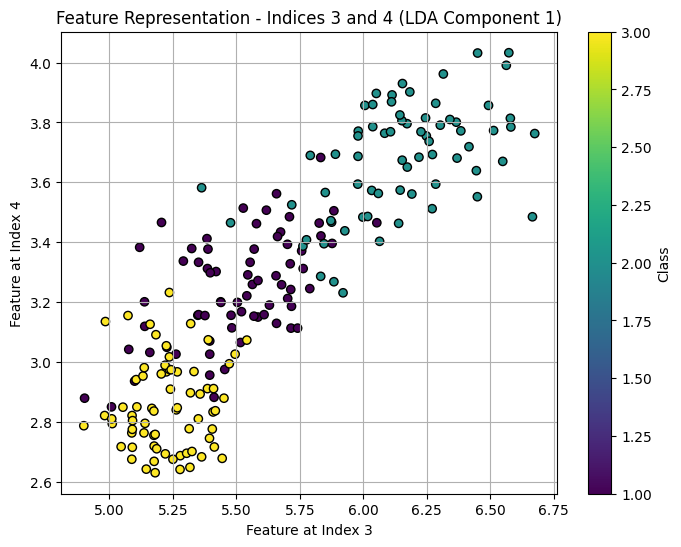

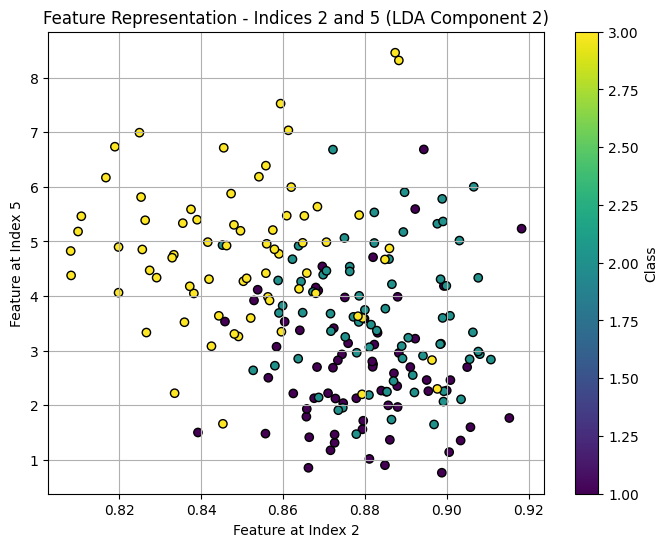

In [10]:
#STEP2
# First LDA Component: Visualize features at indices 3 and 4
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 3], X[:, 4], c=y, cmap='viridis', edgecolor='k')
plt.title('Feature Representation - Indices 3 and 4 (LDA Component 1)')
plt.xlabel('Feature at Index 3')
plt.ylabel('Feature at Index 4')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

# Second LDA Component: Visualize features at indices 2 and 5
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 2], X[:, 5], c=y, cmap='viridis', edgecolor='k')
plt.title('Feature Representation - Indices 2 and 5 (LDA Component 2)')
plt.xlabel('Feature at Index 2')
plt.ylabel('Feature at Index 5')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()
